In [134]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
import math as isfinite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [135]:
df = pd.read_csv("src/1801_project_previousallure.csv")
df.head()

,athlete,gender,timestamp,distance (m),elapsed time (s),elevation gain (m),allure (m/s),average heart rate (bpm),previous_allure
0,18042525,M,2019-12-15 09:08:00,2965.8,812,17.4,3.6525,150.3,3.0458
1,18042525,M,2019-12-10 19:27:00,10020.8,3290,52.2,3.0458,160.8,3.0127
2,18042525,M,2019-12-03 19:46:00,12132.2,4027,249.0,3.0127,148.9,2.6185
3,18042525,M,2019-11-26 19:46:00,11631.5,4442,194.0,2.6185,136.2,2.9110
4,18042525,M,2019-11-19 19:45:00,11708.1,4022,250.7,2.9110,146.0,2.7991


In [136]:
df = df.query("timestamp >= '2018' and timestamp < '2020'")



In [137]:
df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
df["timestamp"].dt.year.value_counts()



#df["Survived"]==1
#-> renvoie un boolean "true" ou "false"
#-> on renomme ça en condition
#condition = df["Survived"]==1

#Je crée un nouveau dataframe avec la condition -> c'est un MASQUE : 
#df[condition]

#Possible de créer un dataframe avec plusieurs conditions : 
#df[condition1 & condition2] = ET 
#df[condition1 | condition2] = OU

/var/folders/1c/xb2wz7j57xs_cv_h1d17grhm0000gp/T/ipykernel_60033/800329146.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)


timestamp
2019    12102
2018    11139
Name: count, dtype: int64

In [138]:
df.isin([np.inf, -np.inf]).sum()


athlete                     0
gender                      0
timestamp                   0
distance (m)                0
elapsed time (s)            0
elevation gain (m)          0
allure (m/s)                0
average heart rate (bpm)    0
previous_allure             0
dtype: int64

In [139]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) 


In [140]:
df.isna().sum() / len(df) * 100


athlete                      0.000000
gender                       0.000000
timestamp                    0.000000
distance (m)                 0.000000
elapsed time (s)             0.000000
elevation gain (m)           0.000000
allure (m/s)                 0.000000
average heart rate (bpm)    39.456134
previous_allure              0.098963
dtype: float64

In [141]:
df = df.dropna(subset=['gender','allure (m/s)','average heart rate (bpm)','previous_allure'])  #Modèle 6
#df = df.dropna(subset=['gender','allure (m/s)', 'previous_allure']) # Modéle 5 et 4 

In [142]:
df.isna().sum() 
df.isna().sum() / len(df) * 100

athlete                     0.0
gender                      0.0
timestamp                   0.0
distance (m)                0.0
elapsed time (s)            0.0
elevation gain (m)          0.0
allure (m/s)                0.0
average heart rate (bpm)    0.0
previous_allure             0.0
dtype: float64

In [143]:
df.isnull().any()


athlete                     False
gender                      False
timestamp                   False
distance (m)                False
elapsed time (s)            False
elevation gain (m)          False
allure (m/s)                False
average heart rate (bpm)    False
previous_allure             False
dtype: bool

In [144]:
df.describe(include="all")

,athlete,gender,timestamp,distance (m),elapsed time (s),elevation gain (m),allure (m/s),average heart rate (bpm),previous_allure
count,1.406100e+04,14061,14061,14061.00000,14061.000000,14061.000000,14061.000000,14061.000000,14061.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.720297e+07,NaN,2019-01-15 21:17:54.196714496,9946.11273,3459.178508,149.955672,2.970099,147.481730,2.954008
min,7.715140e+05,NaN,2018-01-01 08:48:00,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.044697e+07,NaN,2018-07-21 05:12:00,7302.20000,2495.000000,32.000000,2.684500,138.400000,2.674000
50%,1.763980e+07,NaN,2019-02-01 11:02:00,10030.80000,3371.000000,72.000000,2.979800,148.200000,2.971600
75%,2.286624e+07,NaN,2019-07-14 06:50:00,12396.40000,4218.000000,189.000000,3.287000,157.800000,3.280500
max,4.579977e+07,NaN,2019-12-31 17:01:00,21320.50000,19321.000000,1055.000000,26.774400,237.000000,26.774400


In [145]:
#df.to_csv(r"/Users/jeffreyensenat/Downloads/clean_project_dataset.csv")

In [146]:
feature_list = ["gender", "elevation gain (m)", "average heart rate (bpm)", "previous_allure" ]
X = df.loc[:, feature_list]
y = df.loc[:, "allure (m/s)"]

print (X.shape)
print (y.shape)

print(X)
print(type(X))

print(y)
print(type(y))

(14061, 4)
(14061,)
      gender  elevation gain (m)  average heart rate (bpm)  previous_allure
0          M                17.4                     150.3           3.0458
1          M                52.2                     160.8           3.0127
2          M               249.0                     148.9           2.6185
3          M               194.0                     136.2           2.9110
4          M               250.7                     146.0           2.7991
...      ...                 ...                       ...              ...
38358      F               427.7                     124.6           2.5753
38359      F                37.4                     153.4           2.1247
38360      F               206.1                     144.0           2.4718
38361      F               143.5                     158.5           2.5610
38362      F                16.8                     150.8           2.3932

[14061 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
0   

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0) 

                                                    

In [148]:
X_train.head(20)

,gender,elevation gain (m),average heart rate (bpm),previous_allure
28307,M,44.0,161.8,2.7890
19304,M,176.2,157.1,3.1083
25745,F,79.0,169.5,2.5579
28459,M,372.4,135.7,3.0234
13544,M,261.5,139.2,3.3131
37542,F,0.0,152.6,4.2240
23449,M,430.0,158.2,2.9994
2478,M,128.4,119.0,2.7060
13564,M,116.1,171.9,3.2720
18759,M,33.6,135.5,2.4646


In [149]:
#numerical_imputer = SimpleImputer(strategy="mean")
#X_train[["average heart rate (bpm)"]] = numerical_imputer.fit_transform(X_train[["average heart rate (bpm)"]])
# Pour le modèle 5

In [150]:
#numerical_imputer = SimpleImputer(strategy="mean")
#X_test[["average heart rate (bpm)"]] = numerical_imputer.fit_transform(X_test[["average heart rate (bpm)"]])
# pour le modèle 5

In [151]:
X_train.isnull().any()


gender                      False
elevation gain (m)          False
average heart rate (bpm)    False
previous_allure             False
dtype: bool

In [152]:
numeric_features = [1,2,3] 
numeric_transformer = StandardScaler()

categorical_features = [0] 
categorical_transformer = OneHotEncoder()

feature_encoder = ColumnTransformer(
    transformers=[
      ('cat', categorical_transformer, categorical_features),
      ('num', numeric_transformer, numeric_features)])

X_train = feature_encoder.fit_transform(X_train)

print(X_train[0:5,:])

[[ 0.          1.         -0.54566224  0.86767249 -0.25028069]
 [ 0.          1.          0.13910959  0.58302186  0.23536095]
 [ 1.          0.         -0.36436864  1.33401503 -0.60177391]
 [ 0.          1.          1.15538972 -0.713047    0.10623168]
 [ 0.          1.          0.580948   -0.50107313  0.546853  ]]


In [153]:
#param_grid = [{'n_estimators' : [3, 10, 50, 100, 200], 'max_features' : [2,4,6,8]}]
              

In [154]:
#forest_reg = RandomForestRegressor(random_state=0)

#grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                           scoring = 'neg_mean_squared_error', 
#                           return_train_score=True)
#grid_search.fit(X_train, y_train)


In [155]:
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print(best_params)
#print(best_score)

In [156]:
Regressor = RandomForestRegressor(n_estimators=200, random_state=0, max_features=2, max_depth=11)
Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=2, n_estimators=200,
                      random_state=0)

In [157]:
print(X_train[:10])

y_train_pred = Regressor.predict(X_train)

print(y_train_pred[:5])


[[ 0.          1.         -0.54566224  0.86767249 -0.25028069]
 [ 0.          1.          0.13910959  0.58302186  0.23536095]
 [ 1.          0.         -0.36436864  1.33401503 -0.60177391]
 [ 0.          1.          1.15538972 -0.713047    0.10623168]
 [ 0.          1.          0.580948   -0.50107313  0.546853  ]
 [ 1.          0.         -0.7735742   0.31048401  1.93229295]
 [ 0.          1.          1.45374719  0.64964222  0.06972871]
 [ 0.          1.         -0.10848567 -1.72446523 -0.37652015]
 [ 0.          1.         -0.17219742  1.47936855  0.48434165]
 [ 0.          1.         -0.59953234 -0.7251598  -0.74367922]]
[3.2684539  3.21761488 2.69258225 2.6296235  3.02842977]


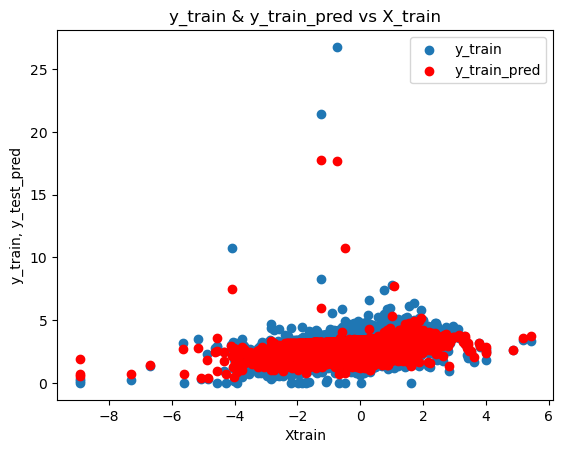

In [158]:
fig, ax = plt.subplots()
ax.set_title("y_train & y_train_pred vs X_train")
ax.set_xlabel("Xtrain")
ax.set_ylabel("y_train, y_test_pred")


_ = ax.scatter(X_train[:,3], y_train)
_ = ax.scatter(X_train[:,3], y_train_pred, c="red")

_ = ax.legend(('y_train', 'y_train_pred'))



In [159]:
print(X_test[:-10])

X_test = feature_encoder.transform(X_test) 
print(X_test[:5])

y_test_pred = Regressor.predict(X_test)
print(y_test_pred[:5])

      gender  elevation gain (m)  average heart rate (bpm)  previous_allure
11330      F                14.9                     140.0           2.7110
29228      M               289.0                     143.8           3.6643
28122      M               855.2                     161.4           3.0196
36906      M               368.6                     163.7           2.9284
16643      M                78.7                     126.3           3.1537
...      ...                 ...                       ...              ...
35872      M                 3.3                     118.5           3.4048
18835      M                87.4                     157.6           3.0267
23533      F                19.8                     165.8           2.5827
3574       M                29.1                     147.8           3.2609
25351      M               818.0                     162.7           2.6323

[2803 rows x 4 columns]
[[ 1.          0.         -0.69639492 -0.45262195 -0.36891536]


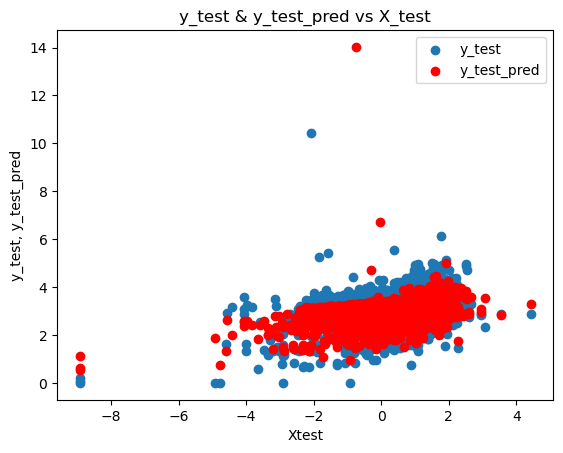

In [160]:
fig, ax = plt.subplots()
ax.set_title("y_test & y_test_pred vs X_test")
ax.set_xlabel("Xtest")
ax.set_ylabel("y_test, y_test_pred")
ax.scatter(X_test[:,3], y_test)
ax.scatter(X_test[:,3], y_test_pred, c="red")
_ = ax.legend(('y_test', 'y_test_pred'))

In [161]:
print(f"R² score on training set : {Regressor.score(X_train, y_train):.2f}")
print(f"R² score on test set     : {Regressor.score(X_test, y_test):.2f}")

R² score on training set : 0.69
R² score on test set     : 0.34
